# Применить один из бустовых классификаторов к своему датасету, кроссвалидацией оценить accuracy. Как она соотносится с accuracy из задания к семинару 3?



## Загрузка данных

* Набор данных был взят с kaggle ["Wine_Quality"](https://www.kaggle.com/code/oaref92/wine-quality).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_red_wine = pd.read_csv('../content/winequality-red.csv', sep=',')
df_white_wine = pd.read_csv('../content/winequality-white.csv', sep=',')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'fixed acidity'),
  Text(2, 0, 'volatile acidity'),
  Text(3, 0, 'citric acid'),
  Text(4, 0, 'residual sugar'),
  Text(5, 0, 'chlorides'),
  Text(6, 0, 'free sulfur dioxide'),
  Text(7, 0, 'total sulfur dioxide'),
  Text(8, 0, 'density'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'sulphates'),
  Text(11, 0, 'alcohol'),
  Text(12, 0, 'quality')])

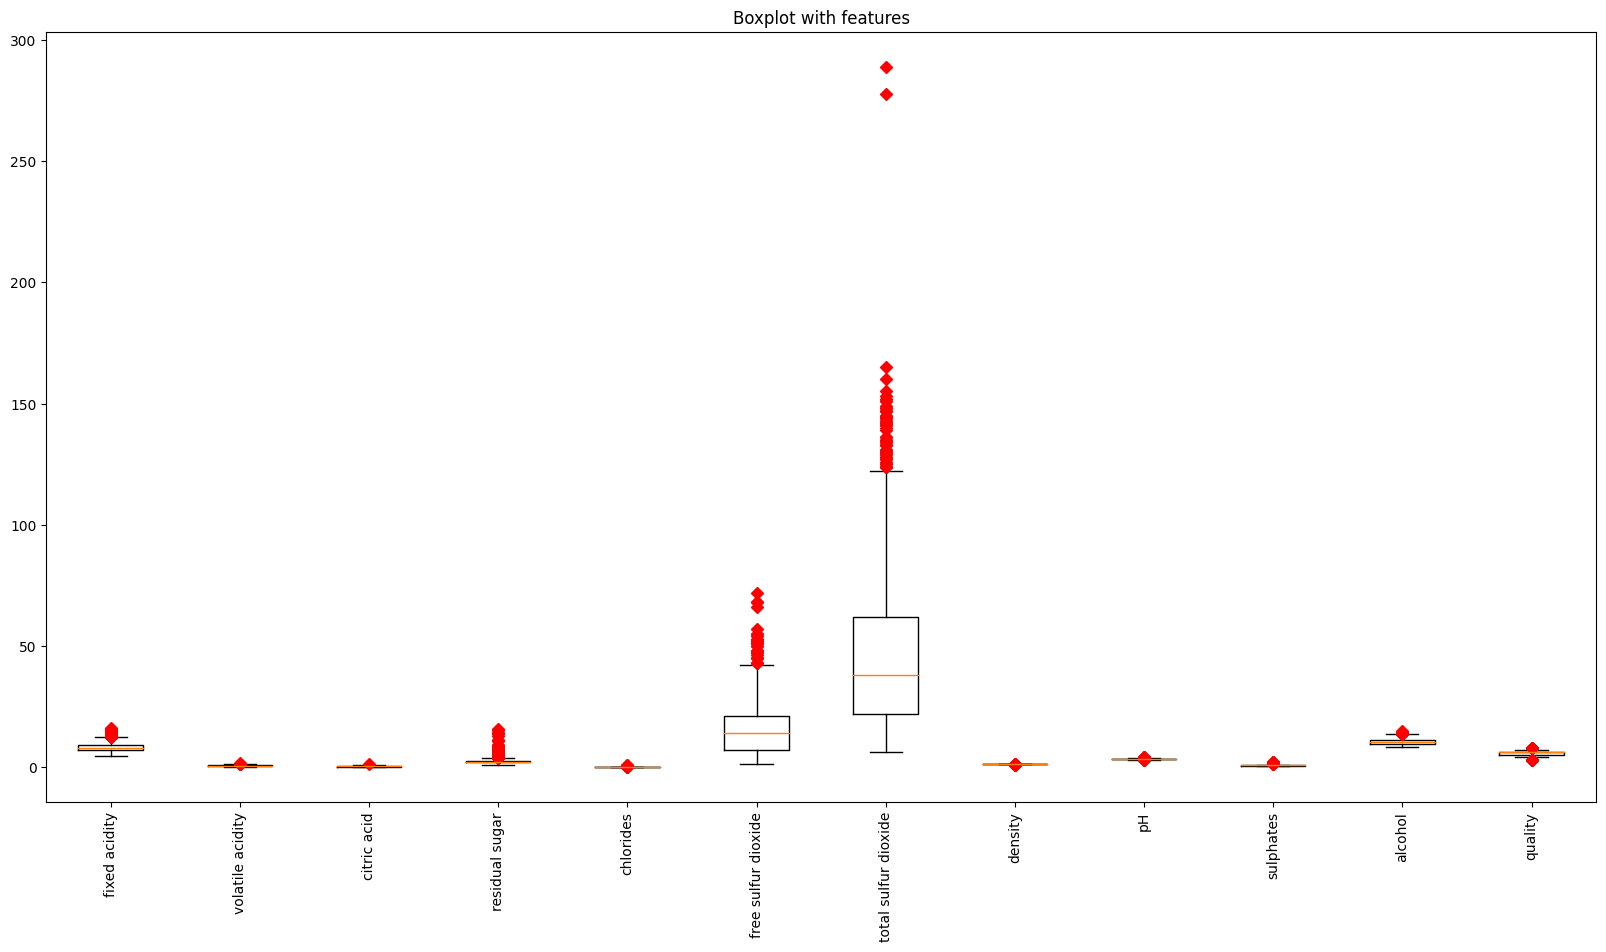

In [2]:
features = list(df_red_wine.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(df_red_wine.values, 0, 'rD', labels = features)
plt.xticks(rotation = 90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'fixed acidity'),
  Text(2, 0, 'volatile acidity'),
  Text(3, 0, 'citric acid'),
  Text(4, 0, 'residual sugar'),
  Text(5, 0, 'chlorides'),
  Text(6, 0, 'free sulfur dioxide'),
  Text(7, 0, 'total sulfur dioxide'),
  Text(8, 0, 'density'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'sulphates'),
  Text(11, 0, 'alcohol'),
  Text(12, 0, 'quality')])

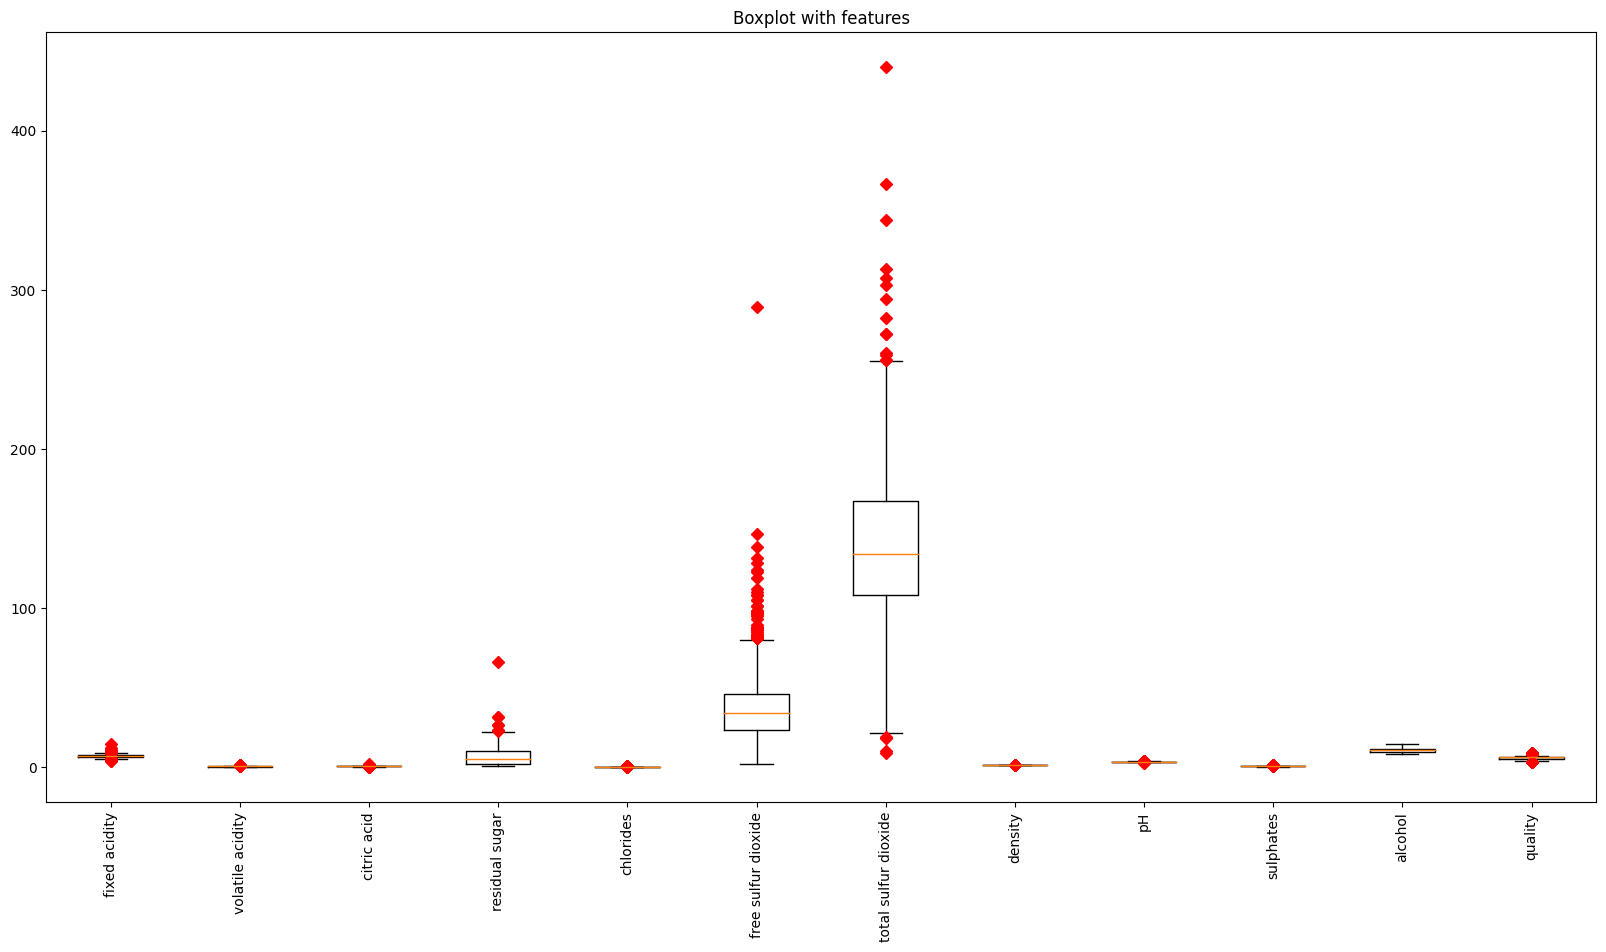

In [3]:
features = list(df_white_wine.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(df_white_wine.values, 0, 'rD', labels = features)
plt.xticks(rotation = 90)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_red_scaled = sc.fit_transform(df_red_wine)
data_red_scaled = pd.DataFrame(data_red_scaled, columns=df_red_wine.columns)
data_red_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [5]:
sc = StandardScaler()
data_white_scaled = sc.fit_transform(df_white_wine)
data_white_scaled = pd.DataFrame(data_white_scaled, columns=df_white_wine.columns)
data_white_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.137870
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.137870
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.137870
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,0.137870
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,-0.991374
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,0.137870
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,1.267114


In [6]:
# Добавляем в dataframe тип вина. 0 - красное, 1 - белое
data_red_scaled['Type'] = 0
data_white_scaled['Type'] = 1

In [7]:
# Склеиваем два dataframe в один
df_marked = pd.concat([data_red_scaled, data_white_scaled], ignore_index=True)
df_marked

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,0.137870,1
6493,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,-0.991374,1
6494,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,0.137870,1
6495,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,1.267114,1


### Подготавливаем данные

In [8]:
X = df_marked.iloc[:, :-1]
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,0.137870
6493,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,-0.991374
6494,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,0.137870
6495,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,1.267114


In [9]:
y = df_marked.Type.values
y

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

## Применяем один из бустовых классификаторов и кроссвалидацией оцениваем accuracy

In [14]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier().fit(X_train, y_train)
ab.score(X_test, y_test)

0.9993846153846154

Вывод: accuracy в обоих случаях получилась очень высокой.

# Визуализировать оценку важности признаков в обученном классификаторе.

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

In [29]:
rf.score(X_test, y_test)

0.9969230769230769

<Axes: >

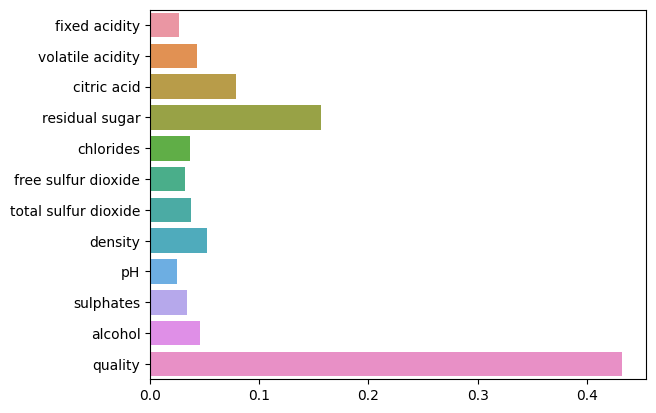

In [30]:
sns.barplot(x=rf.feature_importances_, y=X_train.columns)